In [1]:
import pandas
import matplotlib
import numpy
filename = "C:\\Users\\rb027742\\OneDrive\\Documents\\Machine Learning\\Kaggle\\Titanic\\train.csv"
%magic
%matplotlib inline

In [2]:
df = pandas.read_csv(filename)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [4]:
del df['Name']
del df['Ticket']
del df['Cabin']
del df['PassengerId']
df.count()

Survived    891
Pclass      891
Sex         891
Age         714
SibSp       891
Parch       891
Fare        891
Embarked    889
dtype: int64

In [5]:
df = pandas.get_dummies(df, columns = ['Sex', 'Pclass', 'Embarked'], drop_first=True)
df.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [6]:
df = df.dropna(subset= ['Age', 'Embarked_Q', 'Embarked_S'] )
df.count()

Survived      714
Age           714
SibSp         714
Parch         714
Fare          714
Sex_male      714
Pclass_2      714
Pclass_3      714
Embarked_Q    714
Embarked_S    714
dtype: int64

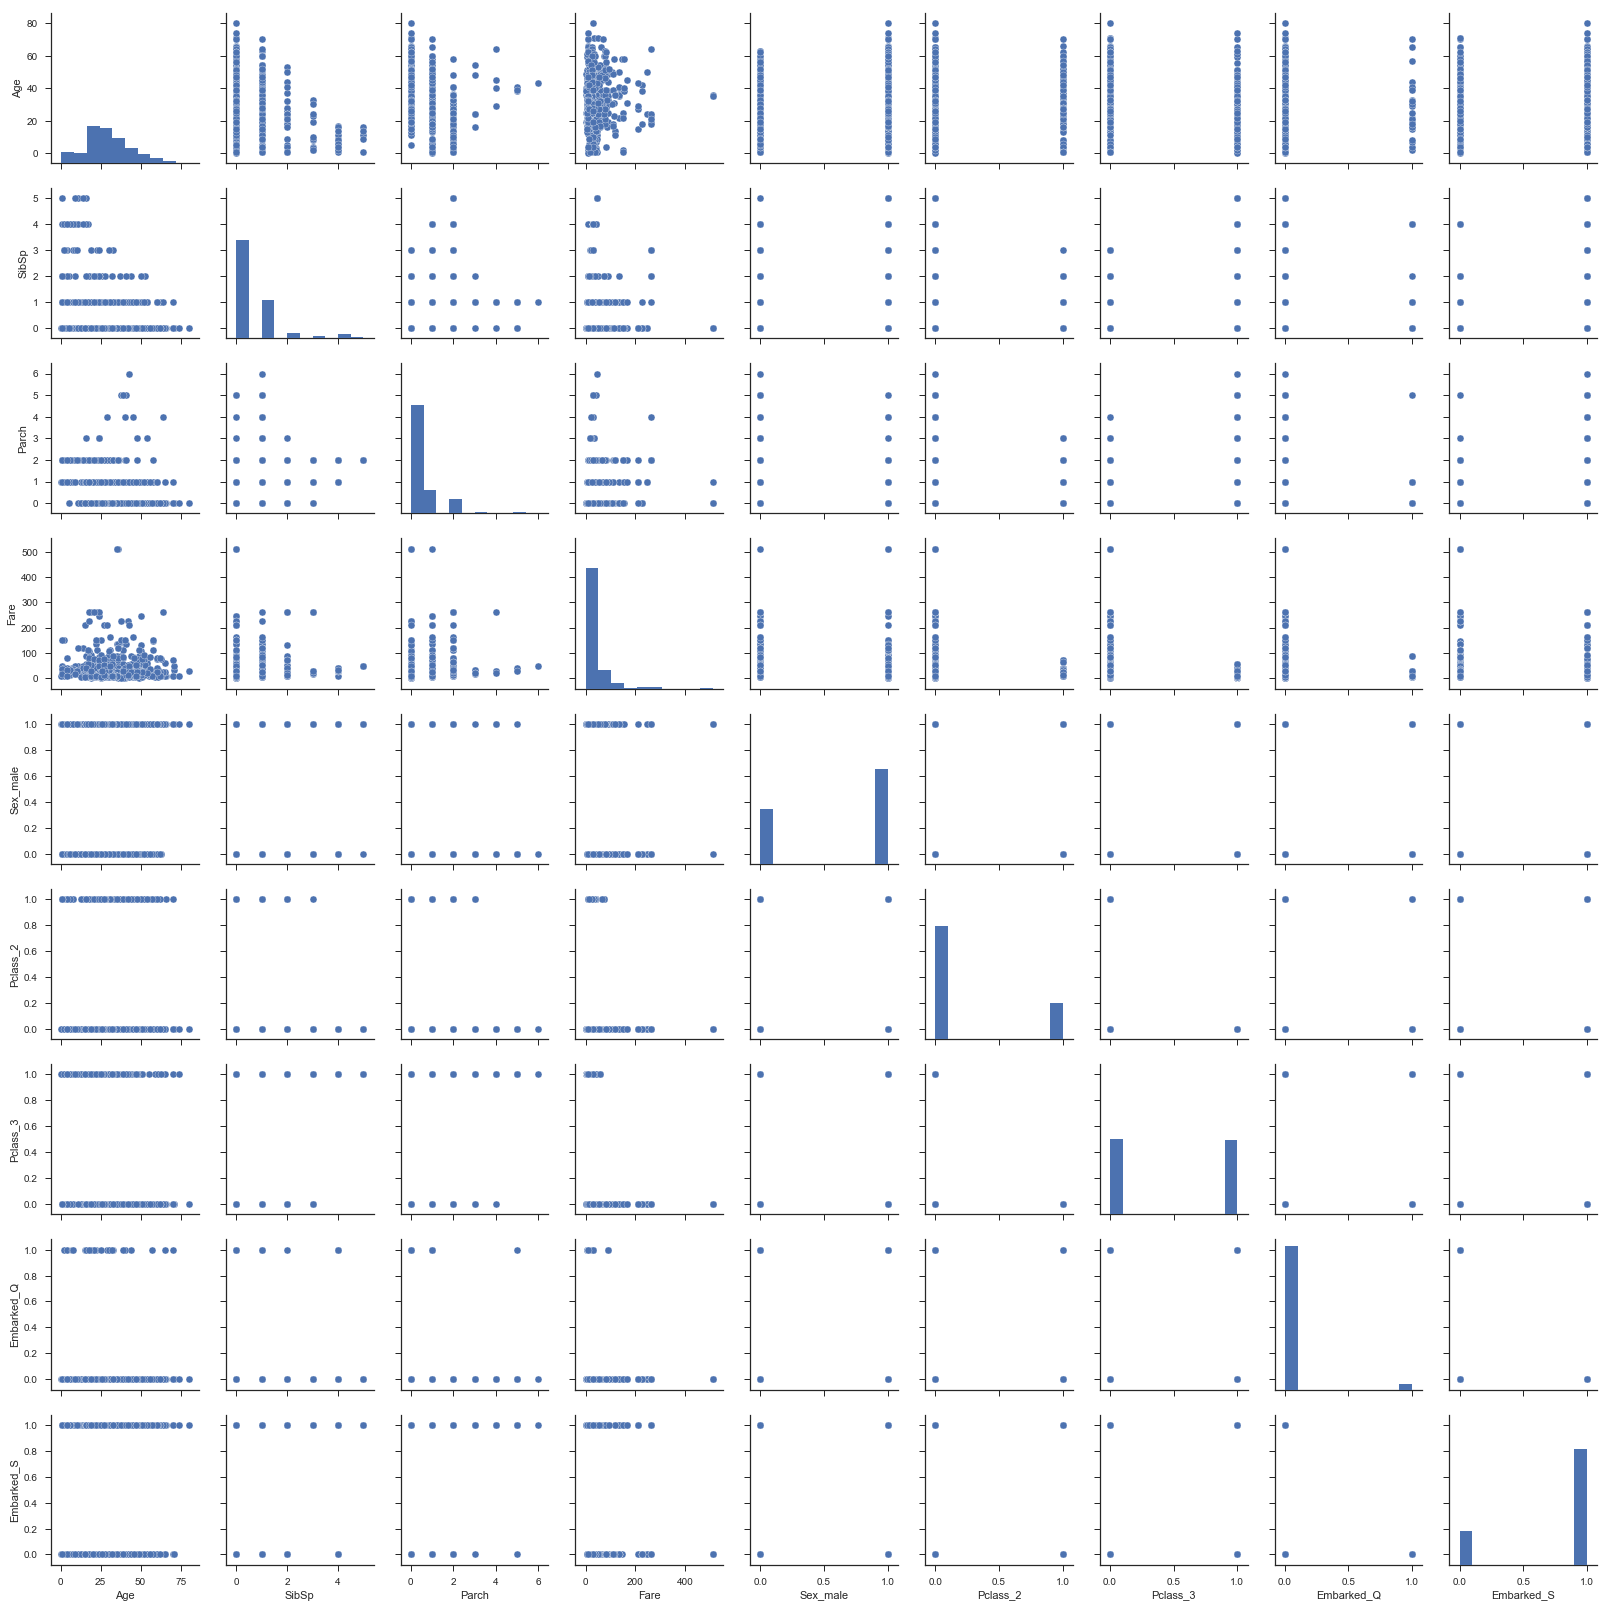

In [21]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(df.loc[:, 'Age':'Embarked_S'])

In [7]:
from sklearn.model_selection import train_test_split
X = df.as_matrix(columns=['Age', 'SibSp', 'Fare', 'Sex_male', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_S'])
y = df.as_matrix(columns=['Survived'])
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
log_model = linear_model.LogisticRegression()
param_grid = [{'C': [1, 10, 100, 1000, 10000, 100000]}]
clf = GridSearchCV(log_model, param_grid, cv=5)
clf.fit(X_train, y_train)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_C',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [16]:
clf.cv_results_['mean_test_score']

array([ 0.79859895,  0.8056042 ,  0.80735552,  0.80735552,  0.80735552,
        0.80735552])

In [17]:
log_model = linear_model.LogisticRegression(C=100)
log_model = log_model.fit(X_train, y_train)
log_model

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
print(log_model.score(X_train, y_train))

0.812609457093


In [20]:
print(log_model.score(X_test, y_test))

0.741258741259


In [21]:
from sklearn.svm import SVC
svm = SVC()
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
clf = GridSearchCV(svm, param_grid, cv=5)
clf.fit(X_train, y_train)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_C',
 'param_gamma',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

In [22]:
clf.cv_results_['mean_test_score']

array([ 0.7915937 ,  0.7915937 ,  0.78633975,  0.80385289,  0.69877408,
        0.68301226,  0.73905429,  0.69877408,  0.79509632,  0.74605954,
        0.80035026,  0.78984238])

In [23]:
svc = SVC(C=100.0, gamma=0.0001, kernel='rbf')
svm_model = svc.fit(X_train, y_train)
svm_model

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
print(svm_model.score(X_train, y_train))

0.788091068301


In [25]:
print(svm_model.score(X_test, y_test))

0.748251748252


In [29]:
svc2 = SVC(kernel='linear')
svm_model_linear = svc2.fit(X_train, y_train)
svm_model_linear

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
print(svm_model_linear.score(X_train, y_train))

0.791593695271


In [31]:
print(svm_model_linear.score(X_test, y_test))

0.734265734266


In [49]:
dfrf = pandas.read_csv(filename)
dfrf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
del dfrf['Name']
del dfrf['Ticket']
del dfrf['Cabin']
del dfrf['PassengerId']
dfrf = dfrf.dropna(subset= ['Age', 'Embarked'])
dfrf.count()

Survived    712
Pclass      712
Sex         712
Age         712
SibSp       712
Parch       712
Fare        712
Embarked    712
dtype: int64

In [55]:
Xrf = dfrf.as_matrix(columns=['Age', 'SibSp', 'Fare', 'Sex', 'Pclass', 'Embarked'])
yrf = dfrf.as_matrix(columns=['Survived'])
yrf = y.ravel()
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc_model = rfc.fit(Xrf_train, yrf_train)

In [57]:
print(rfc_model.score(Xrf_train, yrf_train))

0.980735551664


In [58]:
print(rfc_model.score(Xrf_test, yrf_test))

0.783216783217
